In [27]:
#imports
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

#graphing functions
def plot_2D(graphInfo, title="Generation plot"):
    fig=plt.figure()
    plt.plot(graphInfo["xPlots"],graphInfo["wPlots"],'b-')
    plt.plot(graphInfo["xPlots"],graphInfo["dPlots"],'r-')
    plt.plot(graphInfo["xPlots"],graphInfo["hPlots"],'m-')
    plt.axis([0,len(graphInfo["xPlots"]),0,1])
    plt.show()
def model3D(X,Y,Z,xLabel,yLabel, title):
    #3D graph
    import matplotlib.pyplot as plt
    from matplotlib import cm
    min=1000
    max=-1000
    for rIndex in range(len(Z)):
        for cIndex in range(len(Z[rIndex])):
            if Z[rIndex][cIndex]<min:
                min=Z[rIndex][cIndex]
            if Z[rIndex][cIndex]>max:
                max=Z[rIndex][cIndex]
    if min<-max:
        max=-min
    else:
        min=-max
    
    #label axes
    plt.xlabel(xLabel, fontdict=None, labelpad=None)
    plt.ylabel(yLabel, fontdict=None, labelpad=None)
    plt.title(title)

    
    plt.axis(aspect='image');
    plt.imshow(Z, origin='lower', extent=([0, 1, 0, 1]), vmax=max, vmin=min, cmap=cm.coolwarm)
    plt.show()

def update_vars(oldDataDict, newDataDict):
    for key in newDataDict.keys():
        oldDataDict[key]=newDataDict[key]
    return oldDataDict

def run_generation_iX(simData):
    #load variables
    d=simData['d']
    qW=simData['qW']
    qD=simData['qD']
    qH=simData['qH']
    fW=simData['fW']
    fD=simData['fD']
    eW=simData['eW']
    eD=simData['eD']
    eDP=simData['eDP']
    if simData['curGen']<=simData['induceStart']:
        a=0
    else:
        a=simData['a']
    w2=(qW*fW)**2
    wd=qW*fW*qD*fD
    wh=qW*fW*qH*(1-(1-fD)*d)
    d2=(qD*fD)**2
    dh=qD*fD*qH*(1-(1-fD)*d)
    h2=(qH*(1-(1-fD)*d))**2
    
    zW=(1-a)*(1-eW)*eD + a*(1-eW)*eDP
    zD=(1-a)*eW*(1-eD) + a*eW*(1-eDP)
    zH=(1-a)*(1-eW)*(1-eD) + a*(1-eW)*(1-eDP)
    zS=(1-a)*eD + a*eDP
    zX=(1-a)*eW*eD + a*eW*eDP
    #expected total frquency after loss from fitness
    fBar=(qW*fW+qD*fD+qH*(1-(1-fD)*d))**2 - zX*(2*wd + wh + dh + .5*h2) - zS*(d2 + dh + .25*h2)
    
    qWP = (zW*(2*wd + wh + dh + .5*h2) + w2 + wh + .25*h2)/fBar
    qDP = (zD*(2*wd + wh + dh + .5*h2) + (1-zS)*(d2 + dh + .25*h2))/fBar
    qHP = (zH*(2*wd + wh + dh + .5*h2))/fBar
    #qXP represents amount lost from inviable recombinations
    qXP = zX*(2*wd + wh + dh + .5*h2) + zS*(d2 + dh + .25*h2)
    #catch rounding errors from float multiplication
    total=qWP+qDP+qHP
    if total!=1:
        qWP/=total
        qDP/=total
        qHP/=total
    return {'qW':qWP,'qD':qDP,'qH':qHP}
    
def run_simulation_iX(simData,graph=False,table=False):
    graphInfo={"xPlots": [0], "wPlots": [simData['qW']], "dPlots": [simData['qD']], "hPlots": [simData['qH']]}
    for i in range(1,simData['generations']+1):
        simData['curGen']=i
        update_vars(simData,run_generation_iX(simData))
        graphInfo['xPlots'].append(i)
        graphInfo['wPlots'].append(simData['qW'])
        graphInfo['dPlots'].append(simData['qD'])
        graphInfo['hPlots'].append(simData['qH'])
        if simData['qW']>.99999:
            if graph:
                plot_2D(graphInfo)
            if table:
                print(pd.DataFrame(graphInfo))
            return -(i**(1/4))
        elif simData['qD']>.99999:
            if graph:
                plot_2D(graphInfo)
            if table:
                print(pd.DataFrame(graphInfo))
            return i**(1/4)
    if graph:
        plot_2D(graphInfo)
    if table:
        print(pd.DataFrame(graphInfo))
    return 0

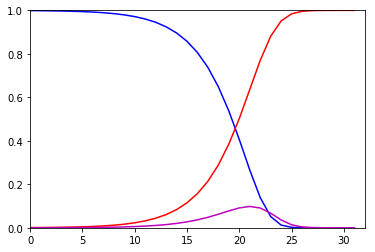

    xPlots        wPlots    dPlots    hPlots
0        0  9.990000e-01  0.001000  0.000000
1        1  9.984802e-01  0.001216  0.000304
2        2  9.978924e-01  0.001686  0.000421
3        3  9.970773e-01  0.002339  0.000584
4        4  9.959475e-01  0.003243  0.000810
5        5  9.943815e-01  0.004496  0.001122
6        6  9.922116e-01  0.006234  0.001554
7        7  9.892061e-01  0.008641  0.002153
8        8  9.850454e-01  0.011976  0.002979
9        9  9.792898e-01  0.016591  0.004119
10      10  9.713366e-01  0.022975  0.005689
11      11  9.603629e-01  0.031794  0.007843
12      12  9.452535e-01  0.043959  0.010787
13      13  9.245125e-01  0.060701  0.014786
14      14  8.961648e-01  0.083666  0.020169
15      15  8.576672e-01  0.115013  0.027320
16      16  8.058797e-01  0.157492  0.036628
17      17  7.372129e-01  0.214420  0.048368
18      18  6.481890e-01  0.289397  0.062414
19      19  5.368477e-01  0.385438  0.077714
20      20  4.055766e-01  0.502988  0.091436
21      21

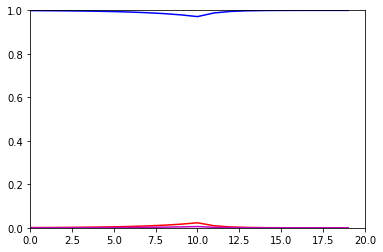

    xPlots    wPlots    dPlots    hPlots
0        0  0.999000  0.001000  0.000000
1        1  0.998480  0.001216  0.000304
2        2  0.997892  0.001686  0.000421
3        3  0.997077  0.002339  0.000584
4        4  0.995947  0.003243  0.000810
5        5  0.994381  0.004496  0.001122
6        6  0.992212  0.006234  0.001554
7        7  0.989206  0.008641  0.002153
8        8  0.985045  0.011976  0.002979
9        9  0.979290  0.016591  0.004119
10      10  0.971337  0.022975  0.005689
11      11  0.988261  0.009416  0.002323
12      12  0.995245  0.003808  0.000947
13      13  0.998084  0.001533  0.000383
14      14  0.999230  0.000616  0.000154
15      15  0.999691  0.000248  0.000062
16      16  0.999876  0.000099  0.000025
17      17  0.999950  0.000040  0.000010
18      18  0.999980  0.000016  0.000004
19      19  0.999992  0.000006  0.000002


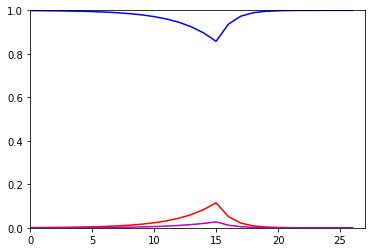

    xPlots    wPlots    dPlots    hPlots
0        0  0.999000  0.001000  0.000000
1        1  0.998480  0.001216  0.000304
2        2  0.997892  0.001686  0.000421
3        3  0.997077  0.002339  0.000584
4        4  0.995947  0.003243  0.000810
5        5  0.994381  0.004496  0.001122
6        6  0.992212  0.006234  0.001554
7        7  0.989206  0.008641  0.002153
8        8  0.985045  0.011976  0.002979
9        9  0.979290  0.016591  0.004119
10      10  0.971337  0.022975  0.005689
11      11  0.960363  0.031794  0.007843
12      12  0.945253  0.043959  0.010787
13      13  0.924512  0.060701  0.014786
14      14  0.896165  0.083666  0.020169
15      15  0.857667  0.115013  0.027320
16      16  0.936727  0.051334  0.011939
17      17  0.973342  0.021455  0.005203
18      18  0.989079  0.008758  0.002163
19      19  0.995579  0.003540  0.000881
20      20  0.998219  0.001425  0.000356
21      21  0.999284  0.000573  0.000143
22      22  0.999712  0.000230  0.000058
23      23  0.99

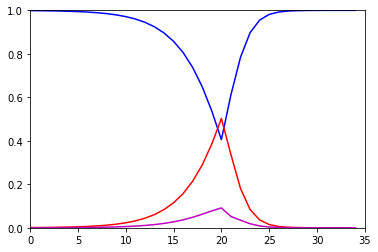

    xPlots    wPlots    dPlots    hPlots
0        0  0.999000  0.001000  0.000000
1        1  0.998480  0.001216  0.000304
2        2  0.997892  0.001686  0.000421
3        3  0.997077  0.002339  0.000584
4        4  0.995947  0.003243  0.000810
5        5  0.994381  0.004496  0.001122
6        6  0.992212  0.006234  0.001554
7        7  0.989206  0.008641  0.002153
8        8  0.985045  0.011976  0.002979
9        9  0.979290  0.016591  0.004119
10      10  0.971337  0.022975  0.005689
11      11  0.960363  0.031794  0.007843
12      12  0.945253  0.043959  0.010787
13      13  0.924512  0.060701  0.014786
14      14  0.896165  0.083666  0.020169
15      15  0.857667  0.115013  0.027320
16      16  0.805880  0.157492  0.036628
17      17  0.737213  0.214420  0.048368
18      18  0.648189  0.289397  0.062414
19      19  0.536848  0.385438  0.077714
20      20  0.405577  0.502988  0.091436
21      21  0.611815  0.336304  0.051881
22      22  0.784449  0.180507  0.035044
23      23  0.89

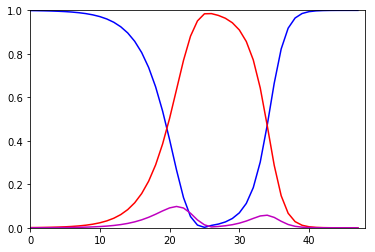

    xPlots    wPlots    dPlots    hPlots
0        0  0.999000  0.001000  0.000000
1        1  0.998480  0.001216  0.000304
2        2  0.997892  0.001686  0.000421
3        3  0.997077  0.002339  0.000584
4        4  0.995947  0.003243  0.000810
5        5  0.994381  0.004496  0.001122
6        6  0.992212  0.006234  0.001554
7        7  0.989206  0.008641  0.002153
8        8  0.985045  0.011976  0.002979
9        9  0.979290  0.016591  0.004119
10      10  0.971337  0.022975  0.005689
11      11  0.960363  0.031794  0.007843
12      12  0.945253  0.043959  0.010787
13      13  0.924512  0.060701  0.014786
14      14  0.896165  0.083666  0.020169
15      15  0.857667  0.115013  0.027320
16      16  0.805880  0.157492  0.036628
17      17  0.737213  0.214420  0.048368
18      18  0.648189  0.289397  0.062414
19      19  0.536848  0.385438  0.077714
20      20  0.405577  0.502988  0.091436
21      21  0.265394  0.636425  0.098181
22      22  0.138717  0.770319  0.090964
23      23  0.05

-2.6183304986958853

In [28]:
simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'d':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':10000}
run_simulation_iX(simData, True, True)

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'d':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':10}
run_simulation_iX(simData,True,True)

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'d':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':15}
run_simulation_iX(simData,True,True)

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'d':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':20}
run_simulation_iX(simData,True,True)

simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'d':.5,'eW':.8,'eD':.05,'eDP':.8,'a':.9,'generations':100, 'induceStart':25}
run_simulation_iX(simData,True,True)

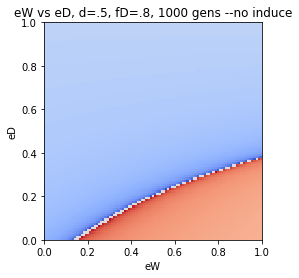

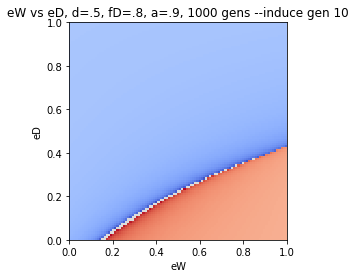

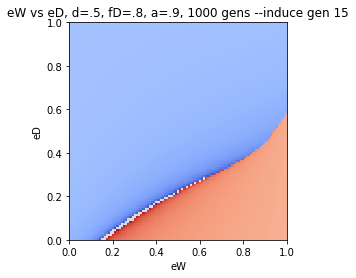

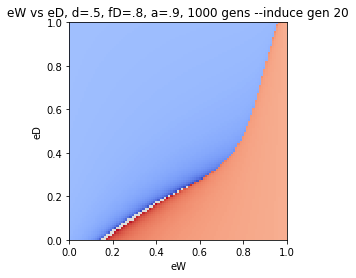

In [29]:
xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'d':.5,'eW':xVals[xIndex],'eD':yVals[yIndex],'eDP':0,'a':0,'generations':1000, 'induceStart':10000}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, 1000 gens --no induce')


xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'d':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':10}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, a=.9, 1000 gens --induce gen 10')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'d':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':15}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, a=.9, 1000 gens --induce gen 15')

xVals=np.arange(0,1.01,.01)
yVals=np.arange(0,1.01,.01)
X,Y=np.meshgrid(xVals,yVals)
Z=np.zeros((len(xVals),len(yVals)))
#run 2D sim e vs f
for xIndex in range(len(xVals)):
    #x is eW
    for yIndex in range(len(yVals)):
        #y is eD
        simData={'qW':.999,'qD':.001,'qH':0,'fW':1,'fD':.8,'d':.5,'eW':xVals[xIndex],'eD':.05,'eDP':yVals[yIndex],'a':.9,'generations':1000, 'induceStart':20}
        takeover=run_simulation_iX(simData)
        Z[yIndex,xIndex]=takeover
model3D(X,Y,Z,'eW','eD','eW vs eD, d=.5, fD=.8, a=.9, 1000 gens --induce gen 20')
